Putra Adam Sultansyah   (5025221098)

Moh. Azril Addia Ananda (5025221084)

In [15]:
%pip install numpy
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Using box-muller transformation

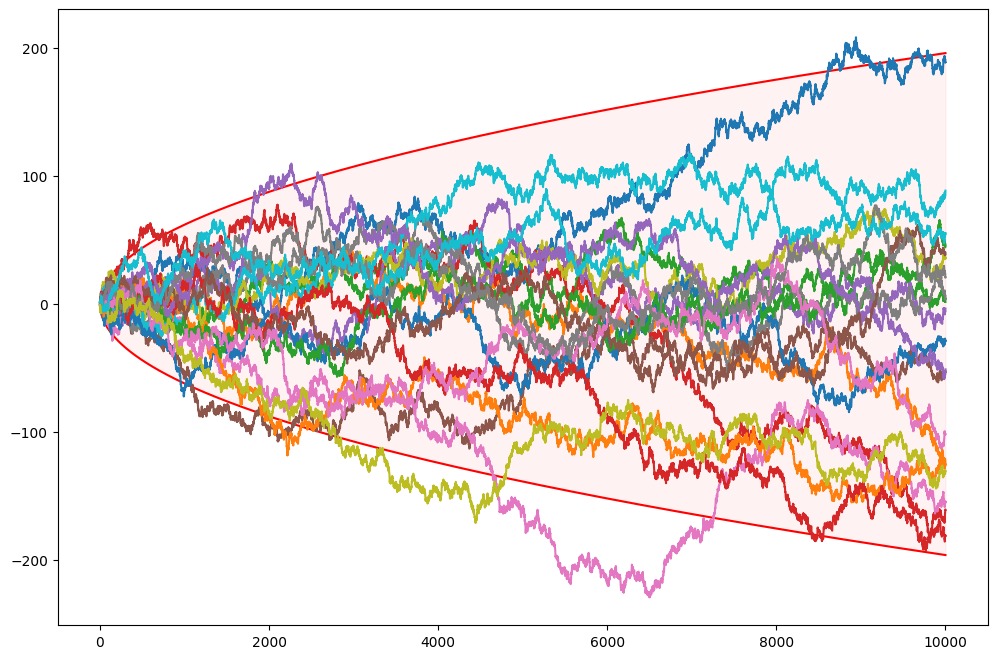

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


U1 = np.random.rand(B, N)
U2 = np.random.rand(B, N)

Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
#Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

X = np.cumsum(Z0, axis=1)

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()

Using mersane twister

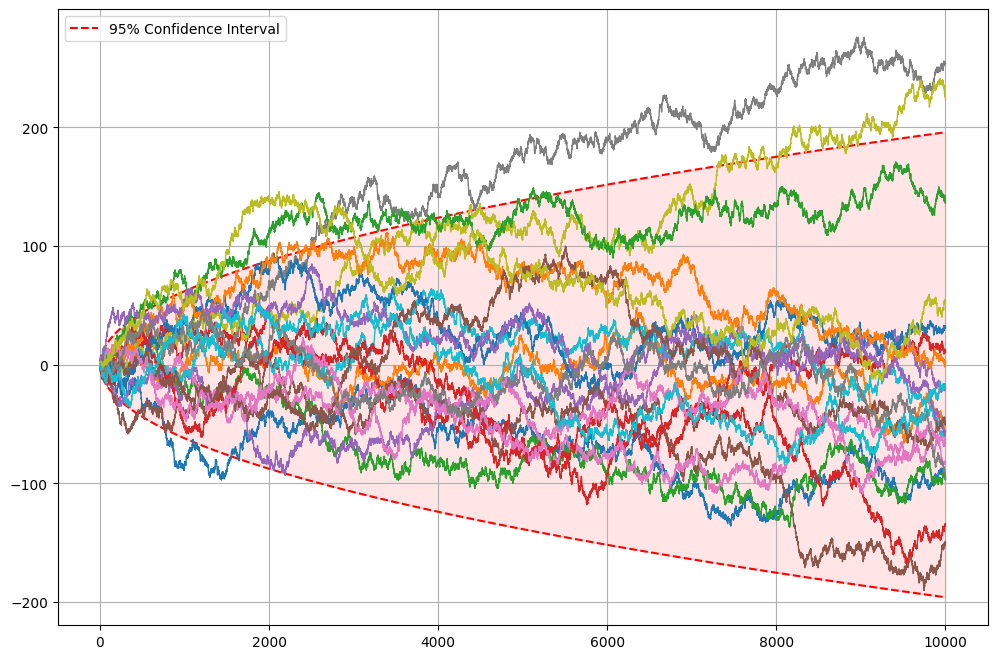

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

def custom_bernoulli_rvs(p, size):
    """Generate an array of Bernoulli random variables.
    
    Parameters:
        p (float): Probability of 1.
        size (tuple): The shape of the array to generate.
        
    Returns:
        numpy.ndarray: Array of Bernoulli random variables.
    """
    return np.array([[1 if random.random() < p else -1 for _ in range(size[1])] for __ in range(size[0])])

N = 10000  # Number of steps
B = 20     # Number of random walks

# Generate Bernoulli random variables using custom function
Y = custom_bernoulli_rvs(0.5, (B, N))
X = np.cumsum(Y, axis=1)

plt.figure(figsize=(12, 8))
nn = np.arange(1, N + 1)

# Calculate the critical z-value for 95% confidence interval
z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), 'r--', label='95% Confidence Interval')
plt.plot(nn, -z * np.sqrt(nn), 'r--')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.1)

# Plot each random walk
for b in range(B):
    plt.plot(nn, X[b], linewidth=1.0)

plt.legend()
plt.grid(True)
plt.show()

Using inverse cdf

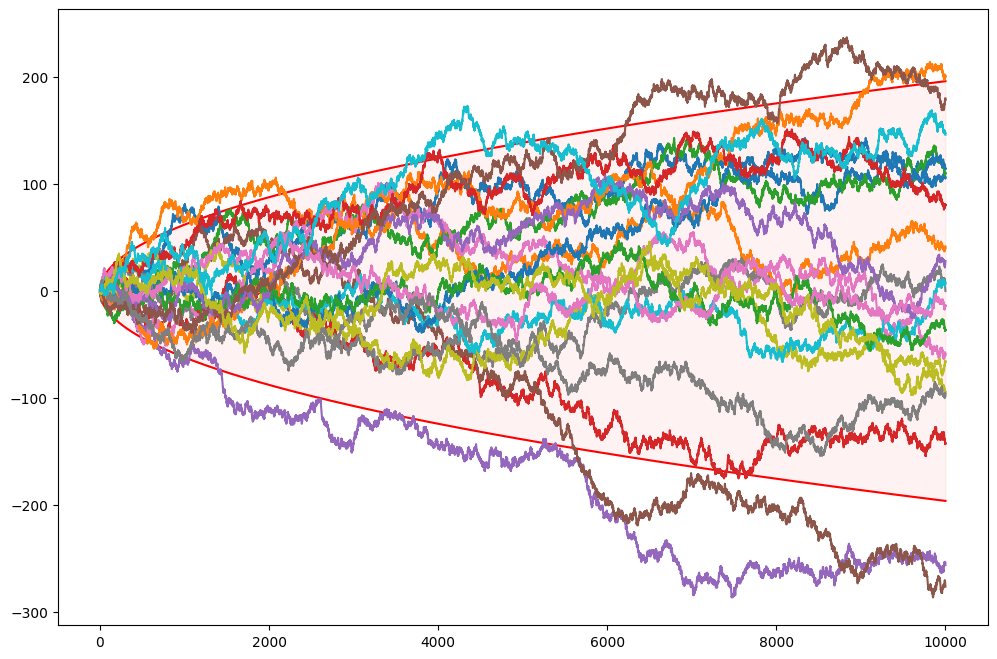

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


N = 10000
B = 20

U = np.random.rand(B, N)

def inverse_cdf(u):
    return np.where(u <= 0.5, 1, -1)

X = np.cumsum(inverse_cdf(U), axis=1)

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()

In [37]:
import numpy as np
from scipy.stats import norm, bernoulli

N = 10000
B = 20

Y = 2 * bernoulli.rvs(p=1/2, loc=0, size=(B, N), random_state=0) - 1
X = np.cumsum(Y, axis=1)

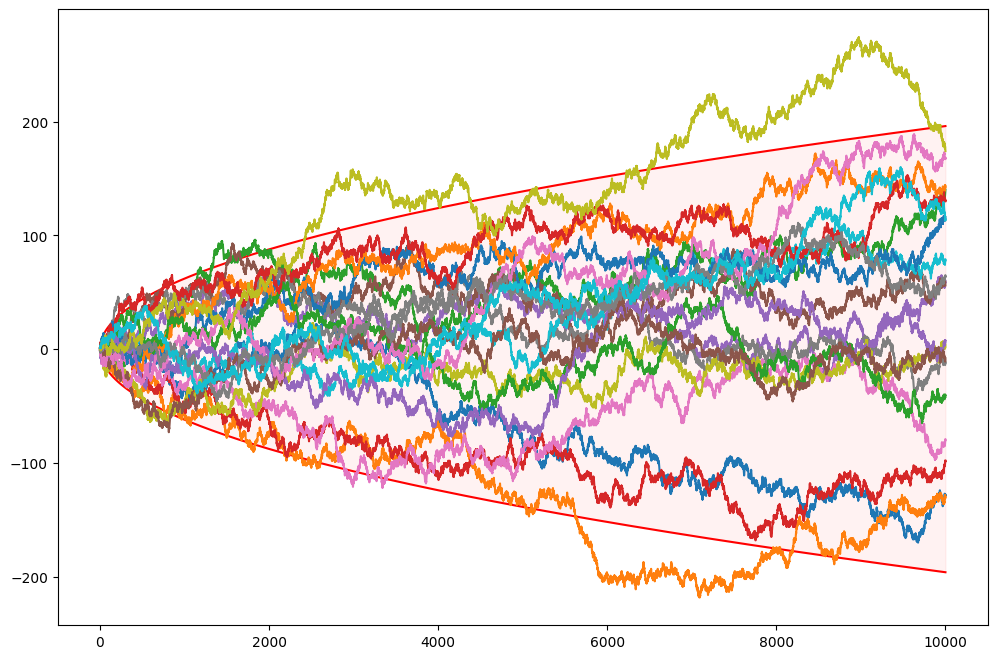

In [38]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()